In [1]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

In [2]:
%matplotlib inline

In [3]:
gtif = gdal.Open( "HillslopeClassification.tif" )
print gtif.GetMetadata()
print gtif.GetDescription()

{'DataType': 'Generic', 'AREA_OR_POINT': 'Area'}
HillslopeClassification.tif


In [4]:
ds = gdal.Open("Dem_Slope.tif")
slope = np.array(ds.GetRasterBand(1).ReadAsArray())

In [5]:
slope[slope<-1] = np.nan

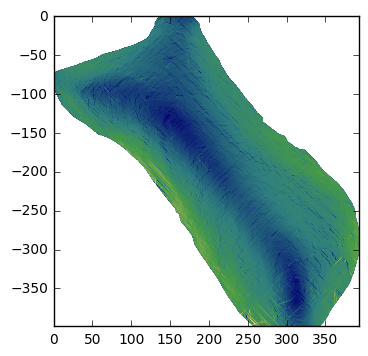

In [6]:
nrows, ncols = slope.shape
# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])


In [8]:
ds = gdal.Open("HillslopeOnlyVeg.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [9]:
# veg = veg.astype(float)
# veg[veg == 0] = np.nan

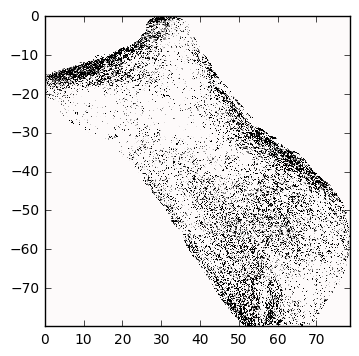

In [10]:
nrows, ncols = slope.shape
# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.figure()
#plt.imshow(clssfy, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.imshow(1-veg, cmap='gist_earth', extent=[x0, x1, y1, y0])


In [11]:
ds = gdal.Open("HillslopeClassification.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [12]:
veg = veg.astype(float)
veg[veg == 255] = np.nan

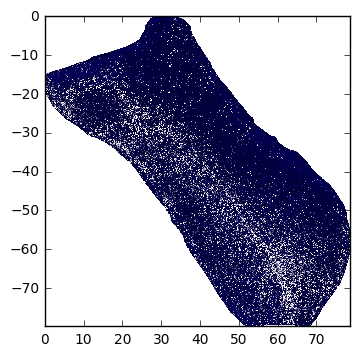

In [13]:
nrows, ncols = slope.shape
# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()  
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.figure()
#plt.imshow(clssfy, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.imshow(veg, cmap='gist_earth', extent=[x0, x1, y1, y0])
